# FRAME EXTRACTION AND PREPROCESSING

This notebook aims to explore the dataset.

We will start by using _cv2_ to test the correct installation done in the [first notebook](01_data_download_and_exploration.ipynb).

In [1]:
import cv2
import os

# Dataset path
train_dataset_path = "../data/mvfouls/train_720p"

# Ejemplo de videos del set de entrenamiento
training_videos_path = os.path.join(train_dataset_path)
example_video = os.path.join(training_videos_path, "action_1/clip_0.mp4")

# Función para visualizar un video
def visualize_video(video_path, num_frames=100):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    
    if not cap.isOpened():
        print(f"No se pudo abrir el video: {video_path}")
        return

    while cap.isOpened() and frame_count < num_frames:
        ret, frame = cap.read()
        if not ret:
            print("Fin del video o error al leer el frame.")
            break
        
        cv2.imshow('Video Frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Presiona 'q' para salir
            break
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

visualize_video(example_video)

Once we are sured the dataset has been installed correctly, we can continue. As we know thanks to the [callenge's paper](https://arxiv.org/abs/2304.04617), each clip longs 5 second, consisting of 3 seconds before and 2 seconds after the timestamp which leaves the action between frame 63 and frame 87. 

We will now explore each **type of action**:
- Standing tackling
- Tackling
- Challenge
- Holding
- Elbowing
- High leg
- Pushing
- Dive

We will now count how many are of each **types** in the train dataset.

In [2]:
import os
import json
from collections import Counter

attribute = 'Action class'

def count_types(attribute, labels_path = os.path.join(train_dataset_path, "annotations.json")):
    with open(labels_path, "r") as f:
        data = json.load(f)
    
    types = []
    
    for action_index, action_data in data['Actions'].items():
        type = action_data[attribute]
        types.append(type)

    types.sort()
    
    types_count = Counter(types)

    print(f"{attribute} and its frequency:")
    for t, count in types_count.items():
        print(f"  - {t}: {count}")

count_types(attribute)

Action class and its frequency:
  - : 11
  - Challenge: 383
  - Dive: 28
  - Dont know: 52
  - Elbowing: 178
  - High leg: 103
  - Holding: 361
  - Pushing: 88
  - Standing tackling: 1264
  - Tackling: 448


As we see there are some marked as "", with only 11 out of 2.916 records having an empty tag (0,38%), removing them won't significantly impact the dataset.

Also we can study the **class distribution** in the dataset, wich allows us to identify possible imbalance in the dataset through charts.

In [3]:
def plot_chart(title, x_label, types, frequencies):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=types, y=frequencies, hue=types)
    plt.title("Offence Distribution")
    plt.xlabel("Offence / No offence")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

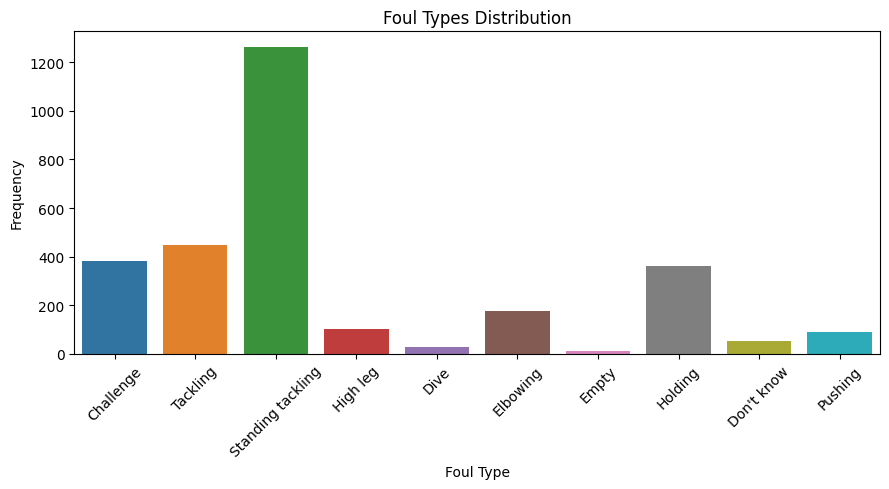

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

foul_types = ["Challenge", "Tackling", "Standing tackling", "High leg", "Dive", "Elbowing", "Empty", "Holding", "Don't know", "Pushing"]
frequencies = [383, 448, 1264, 103, 28, 178, 11, 361, 52, 88]

plt.figure(figsize=(9, 5))
sns.barplot(x=foul_types, y=frequencies, hue=foul_types)
plt.title("Foul Types Distribution")
plt.xlabel("Foul Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we already saw in the count, there is a **big imbalance** between classes wich could lead to bias, poor generalization and **overfitting to majority class**. This will be a fact to be taken into account later on.

We will now do the same study with the **offence** class:
- Offence
- No offence
- Between

In [5]:
count_types('Offence')

Offence and its frequency:
  - : 1
  - Between: 96
  - No offence: 324
  - Offence: 2495


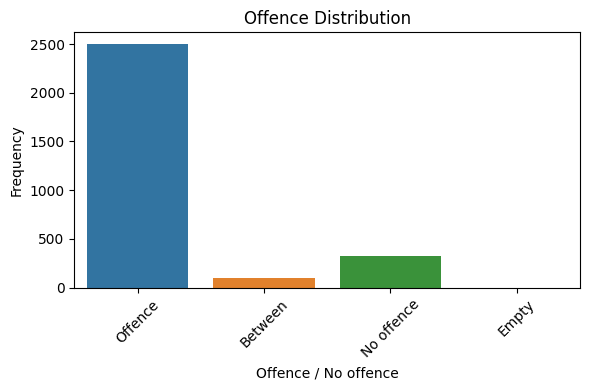

In [6]:
types = ["Offence", "Between", "No offence",  "Empty"]
frequencies = [2495, 96, 324, 1]

plot_chart("Offence Distribution", "Offence / No offence", types, frequencies)

As we see it happens the same thing as with the type of action.

And with the **severity**.

In [7]:
count_types('Severity')

Severity and its frequency:
  - : 353
  - 1.0: 1402
  - 2.0: 403
  - 3.0: 687
  - 4.0: 44
  - 5.0: 27


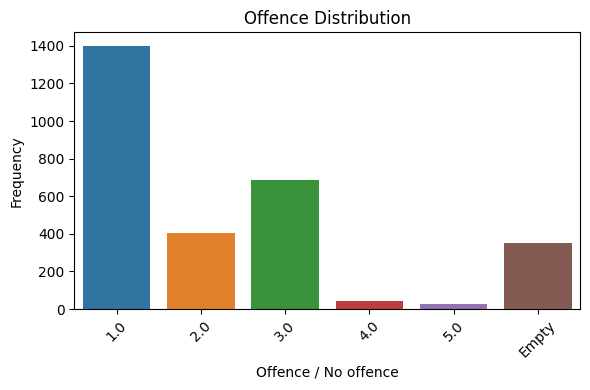

In [8]:
severities = ["1.0", "2.0", "3.0", "4.0", "5.0", "Empty"]
frequencies = [1402, 403, 687, 44, 27, 353]

plot_chart("Offence Distribution", "Offence / No offence", severities, frequencies)

Continuing with the exploration, we will now focus on proving the relation of the tags with the clips is ok by **representing one clip per type of action**.

In [9]:
import os
import json

def show_video_of_type(action_class, class_type):
    labels_path = os.path.join(train_dataset_path, "annotations.json")

    with open(labels_path, "r") as f:
        data = json.load(f)
        
    action_paths = []

    for action_index, action_data in data['Actions'].items():
        if action_data[action_class] == class_type:
            action_clips = action_data['Clips']
            for action in action_clips:
                action_paths.append(action['Url'])
            break
            
    dataset_path = "../data/mvfouls/train_720p/"

    corrected_action_paths = [path.replace('Dataset/Train/', dataset_path) for path in action_paths]
    corrected_action_paths = [path if path.endswith('.mp4') else path + ".mp4" for path in corrected_action_paths]
    
    for video in corrected_action_paths:
        visualize_video(video)

In [ ]:
show_video_of_type('Action class', 'Pushing')

Same for the Offence / No Offence class.

In [15]:
show_video_of_type('Offence', 'No offence')

And severity.

In [16]:
show_video_of_type('Severity', '5.0')